In [1]:
def warn(*args, **kwargs):
  pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [3]:
data = pd.read_csv("datasets/Ames_Housing_Sales.csv")

data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [4]:
data.shape

(1379, 80)

In [5]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          82 non-null     object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       953 non-null    object 
 7   BsmtExposure   953 non-null    object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   953 non-null    object 
 11  BsmtFinType2   952 non-null    object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       953 non-null    object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [7]:
mask = data.dtypes == object
mask

1stFlrSF        False
2ndFlrSF        False
3SsnPorch       False
Alley            True
BedroomAbvGr    False
                ...  
WoodDeckSF      False
YearBuilt       False
YearRemodAdd    False
YrSold          False
SalePrice       False
Length: 80, dtype: bool

In [8]:
categorical_cols = data.columns[mask]

In [9]:
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x : x.nunique())
                .sort_values(ascending= False))

small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols > 1]

small_num_ohc_cols -= 1

small_num_ohc_cols.sum()

204

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

data_ohc = data.copy()

le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    dat = le.fit_transform(data_ohc[col]).astype(int)

    data_ohc = data_ohc.drop(col, axis = 1)

    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)
    data_ohc = pd.concat([data_ohc, new_df], axis= 1)

In [11]:
data_ohc.shape[1] - data.shape[1]

215

In [12]:
print(data.shape[1])
data = data.drop(num_ohc_cols.index, axis= 1)
print(data.shape[1])

80
37


In [13]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state=42)


feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc,
                                                                     test_size= 0.3, random_state=42)

In [14]:
(X_train_ohc.index == X_train.index).all()

True

In [15]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
461,630.0,0.0,0.0,1,515.0,0.0,1,0,115.0,0.0,...,8,4,0.0,0.0,3,630.0,0.0,1970,2002,2009
976,845.0,0.0,0.0,3,0.0,0.0,0,0,0.0,0.0,...,3,4,0.0,0.0,5,0.0,186.0,1957,1957,2009
1128,728.0,728.0,0.0,3,0.0,0.0,0,0,728.0,0.0,...,5,6,0.0,0.0,8,728.0,100.0,2005,2005,2008
904,561.0,668.0,0.0,2,285.0,0.0,0,0,276.0,0.0,...,6,6,0.0,0.0,5,561.0,150.0,1980,1980,2009
506,1601.0,0.0,0.0,3,1358.0,0.0,1,0,223.0,0.0,...,5,8,0.0,0.0,6,1581.0,180.0,2001,2002,2010


In [17]:
X_train_ohc.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,GarageFinish_2,Street_0,Street_1,Alley_0,Alley_1,Alley_2,CentralAir_0,CentralAir_1,Utilities_0,Utilities_1
461,630.0,0.0,0.0,1,515.0,0.0,1,0,115.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
976,845.0,0.0,0.0,3,0.0,0.0,0,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1128,728.0,728.0,0.0,3,0.0,0.0,0,0,728.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
904,561.0,668.0,0.0,2,285.0,0.0,0,0,276.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
506,1601.0,0.0,0.0,3,1358.0,0.0,1,0,223.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

error_df = list()

LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test': mean_squared_error(y_test, y_test_pred)},
                           name = 'no enc'))

LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test': mean_squared_error(y_test_ohc, y_test_ohc_pred)},
                           name = 'one hot enc'))

error_df = pd.concat(error_df, axis = 1)
error_df

,no enc,one hot enc
train,1.131507e+09,3.177284e+08
test,1.372182e+09,5.534626e+19


In [20]:
pd.options.mode.chained_assignment = None

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

scalers = {'scaler' : StandardScaler(),
           'minmax' : MinMaxScaler(),
           'maxabs' : MaxAbsScaler()}

training_test_sets = {
    'not_encoded' : (X_train, y_train, X_test, y_test),
    'one_hot_encoded' : (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)
}

mask = X_train.dtypes == float
float_columns = X_train.columns[mask]

errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = X_train.copy()
        testset = X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-'*80)

for key, error_val in errors.items():
    print(key, error_val)

not_encoded - scalerscaling        1.372182e+09
not_encoded - minmaxscaling        1.371591e+09
not_encoded - maxabsscaling        1.371741e+09
one_hot_encoded - scalerscaling    1.372182e+09
one_hot_encoded - minmaxscaling    1.371591e+09
one_hot_encoded - maxabsscaling    1.371741e+09
--------------------------------------------------------------------------------
not_encoded - scalerscaling 1372182358.934502
not_encoded - minmaxscaling 1371591103.4031448
not_encoded - maxabsscaling 1371740539.2826617
one_hot_encoded - scalerscaling 1372182358.934502
one_hot_encoded - minmaxscaling 1371591103.4031448
one_hot_encoded - maxabsscaling 1371740539.2826617


[Text(0.5, 0, 'Ground Truth'),
 Text(0, 0.5, 'Predictions'),
 Text(0.5, 1.0, 'Ames_housing truth vs predictions using Linear Regression')]

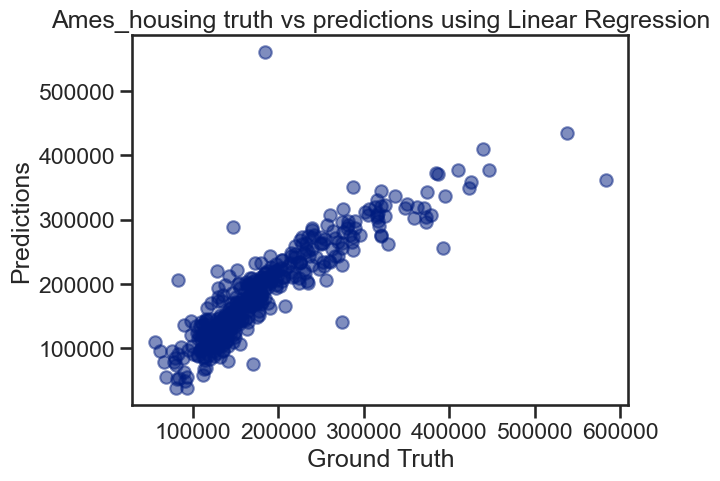

In [22]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test, y_test_pred, alpha = 0.5)

ax.set(xlabel = 'Ground Truth',
       ylabel = 'Predictions',
       title = 'Ames_housing truth vs predictions using Linear Regression')

[Text(0.5, 0, 'Ground Truth'),
 Text(0, 0.5, 'Predictions'),
 Text(0.5, 1.0, 'Ames_housing truth vs predictions using Linear Regression')]

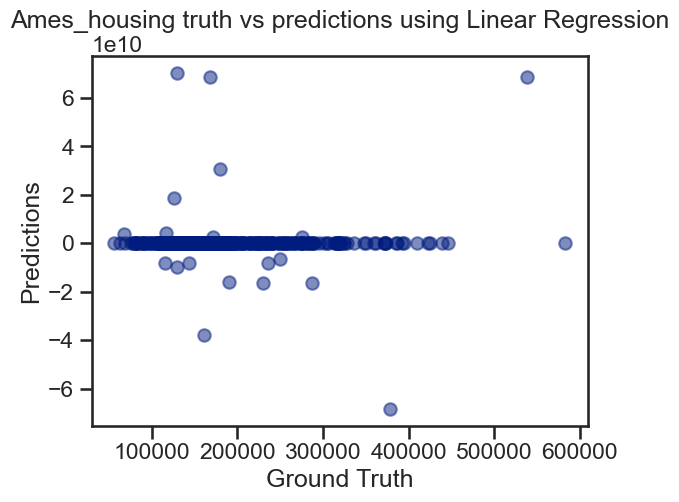

In [23]:
ax1 = plt.axes()

ax1.scatter(y_test_ohc, y_test_ohc_pred, alpha = 0.5)

ax1.set(xlabel = 'Ground Truth',
       ylabel = 'Predictions',
       title = 'Ames_housing truth vs predictions using Linear Regression')